In [1]:
### Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 

In [68]:
### Load in Stock Data
tickers = ['GOOG', 'AAPL']
start_date = '2018-01-01'

def import_stock_data(tickers, start_date):
    # Check if tickers is a list or a single ticker string
    if isinstance(tickers, list):
        data = yf.download(tickers, start=start_date)[['Close', 'High', 'Low']]
    else:
        data = yf.download(tickers, start=start_date)[['Close', 'High', 'Low']]
        data = pd.DataFrame(data)

    # Reset index to make 'Date' a column instead of index
    data.reset_index(inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])

    return data

stock_data = import_stock_data(tickers, start_date)
stock_data

[*********************100%%**********************]  2 of 2 completed


Date       Close                    High                     Low  \
                       AAPL        GOOG        AAPL        GOOG        AAPL   
0    2018-01-02   43.064999   53.250000   43.075001   53.347000   42.314999   
1    2018-01-03   43.057499   54.124001   43.637501   54.314499   42.990002   
2    2018-01-04   43.257500   54.320000   43.367500   54.678501   43.020000   
3    2018-01-05   43.750000   55.111500   43.842499   55.212502   43.262501   
4    2018-01-08   43.587502   55.347000   43.902500   55.563499   43.482498   
...         ...         ...         ...         ...         ...         ...   
1577 2024-04-10  167.779999  157.660004  169.089996  158.160004  167.110001   
1578 2024-04-11  175.039993  160.789993  175.460007  161.119995  168.160004   
1579 2024-04-12  176.550003  159.190002  178.360001  161.699997  174.210007   
1580 2024-04-15  172.690002  156.330002  176.630005  160.830002  172.500000   
1581 2024-04-16  169.380005  156.000000  173.759995  157.229996  168.270004   

                  
            GOOG  
0      52.261501  
1      53.160500  
2      54.200100  
3      54.599998  
4      55.081001  
...          ...  
1577  156.199997  
1578  157.929993  
1579  158.600006  
1580  156.149994  
1581  155.050003  

[1582 rows x 7 columns]

In [49]:
### Function to Calculate CCI
def calculate_cci(df, window):
    # empty list init
    cci_last_row = []

    # Calculate Typical Price (TP) = (High + Low + Close) / 3
    typ_price = (df['High'] + df['Low'] + df['Close']) / 3 
    # Simple Moving Average (SMA) of TP
    sma = typ_price.rolling(window = window).mean()  
    # Mean Deviation (MD) = absolute difference between the TP and the SMA
    mean_dev = (typ_price - sma).abs().rolling(window=window).mean()  
    # Calculate Commodity Channel Index (CCI) = (TP - SMA) / (0.015 * MD)
    cci = (typ_price - sma) / (0.015 * mean_dev)
    
    # Append last two row values to cci_vals list
    cci_last_row.extend(cci.iloc[-1:].values)
    # extract just the final row of values
    cci_vals = np.array(cci_last_row[0])

    return cci, cci_vals

cci, cci_vals = calculate_cci(stock_data, window=20)
print(cci.tail(5))
print("CCI values list: ", cci_vals)

            AAPL       GOOG
1577  -83.116749  54.151133
1578   37.652353  65.986501
1579  125.203038  57.000358
1580   61.548149  33.249837
1581  -29.605120  17.602163
CCI values list:  [-29.60512036  17.60216304]


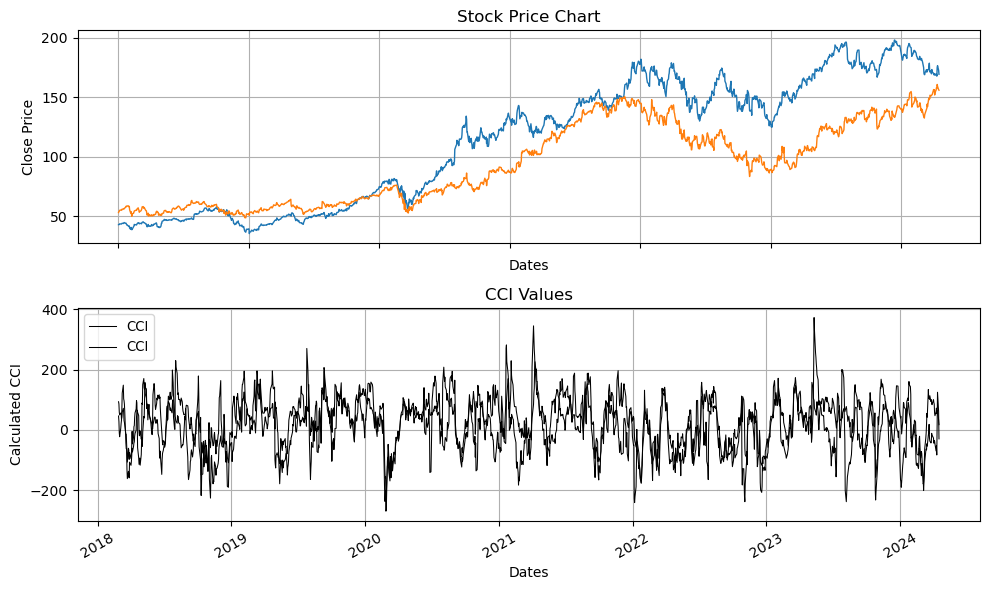

In [74]:
### Plot CCI
# Plot Stocks Analyzed
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(stock_data['Date'], stock_data['Close'], lw = 1)
plt.title('Stock Price Chart')
plt.ylabel('Close Price')
plt.xlabel('Dates')
plt.grid(True)

# Add CCI Subplot
bx = fig.add_subplot(2, 1, 2)
plt.plot(stock_data['Date'], cci, 'k', lw = 0.75, linestyle = '-', label = 'CCI')
plt.title('CCI Values')
plt.legend(loc = 2, prop = {'size': 9.5})
plt.ylabel('Calculated CCI')
plt.xlabel('Dates')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation = 30)
plt.tight_layout()
plt.show()
